In [1]:
import mlflow
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.autolayout'] = True
%matplotlib inline

/home/jader/curricular-transfer-learning/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


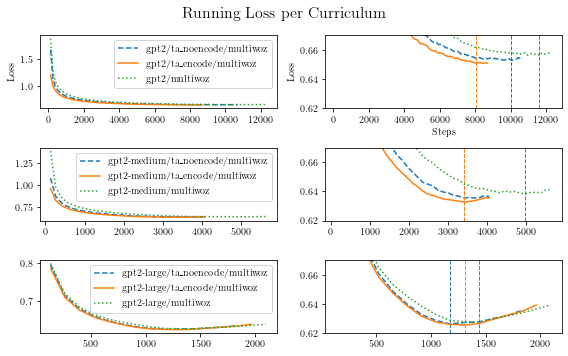

In [20]:
fig, ax = plt.subplots(figsize=(8, 5), nrows=3, ncols=2)
fig.suptitle("Running Loss per Curriculum", fontsize=16)
client = mlflow.tracking.MlflowClient()

index = {"gpt2":0, "medium":1, "large":2}
lsname = {"multiwoz": ':',
"ta_encode":'-',
"ta_noencode":'--'}

for run in mlflow.search_runs('0').run_id:
    metrics = client.get_metric_history(run, 'eval_loss')
    loss = [x.value for x in metrics]
    step = [x.step for x in metrics]
    minimal = step[np.argmin(loss)]
    name = client.get_run(run).data.params["output_dir"].lstrip("models/")
    i = index[name.split("/")[0].split("-")[-1]]
    ls = lsname[name.split("/")[1]]
    ax[i][0].plot(step, loss, label=name, linestyle=ls)
    p = ax[i][1].plot(step, loss, label=name, linestyle=ls)
    ax[i][1].axvline(minimal, color=p[0].get_color(), linestyle="--", linewidth=1)
    # ax[1][i].set_xlim(3000, 6000)
    ax[i][1].set_ylim(0.62, 0.67)
    ax[i][0].legend()
ax[0][1].set_xlabel("Steps")
ax[0][0].set_ylabel("Loss")
ax[0][1].set_ylabel("Loss")
fig.savefig("loss.pdf", dpi=300)

In [1]:
import ecco

In [2]:
model_config = {
    'embedding': "transformer.wte.weight",
    'type': 'causal',
    'activations': ['mlp\.c_proj'], #This is a regex
    'token_prefix': 'Ġ',
    'partial_token_prefix': ''
}

explain = ecco.from_pretrained("models/gpt2-large/ta_encode", activations=True, model_config=model_config)

In [ ]:
output = explain.generate("<sos_u>we are a family of 3 planning staying a week in rio de janeiro. "
                 "any suggestions for area , nice restaurant etc ?<eos_u><sos_b>",
                generate=1, attribution=['ig'])

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
output.primary_attributions(attr_method='ig')

In [ ]:
output.primary_attributions(attr_method='ig', style="detailed")

In [ ]:
output.layer_predictions(position=30, layer=11)